

---


# GROUP 183 FINAL PROJECT


---





---


## Table of Contents


---



>[GROUP 183 FINAL PROJECT](#scrollTo=7STp2vwOjAkO)

>>[Table of Contents](#scrollTo=BsFIdQPj54NH)

>>[Flow Chart](#scrollTo=wEONX3tDrVtH)

>>[Finalized Research Question](#scrollTo=TlRD1V-GjAkQ)

>>[Boxplots](#scrollTo=Q67k8jDojAkS)

>>[Heatmap](#scrollTo=CA5W9sX4jAkS)

>>[Distribution Plots (Numeric & Non-numeric)](#scrollTo=BuGigtCZjAkT)

>>[Selecting a Baseline Model](#scrollTo=-dblzv0M16v1)

>>>[Logistic Regression](#scrollTo=TlCVuAyP2RZC)

>>>>[Interpretation of the Logistic Regression's results](#scrollTo=CAH52g_B2AaF)

>>>>[Final Thoughts on the Logistic Regression](#scrollTo=owajPyct2Mjq)

>>>[Decision Tree](#scrollTo=Ed71SHWW2lDg)

>>>>[Interpretation of the Decision Tree's results](#scrollTo=S-7uUycU2vcf)

>>>>[Final Thoughts on the Decision Tree](#scrollTo=93mRt-BP25TL)

>>>[Random Forest](#scrollTo=HYbtPuiL2nXy)

>>>>[Interpretation of the Random Forest's results](#scrollTo=v8AKwDGY28zo)

>>>>[Final Thoughts on the Random Forest](#scrollTo=VhxVd-dg3DSC)

>[Boosting](#scrollTo=LkKN_q-DVcBZ)

>[Interaction Terms](#scrollTo=Msdrt900fy4k)

>[Stacking](#scrollTo=kcgPjxN9Ydep)

>[PCA](#scrollTo=CYVmONf-3Ugk)

>>[Exploring PCA to improve the Random Forest's performance](#scrollTo=91hGRLidS4GC)

>[Final Pipeline](#scrollTo=M462jw-Wya_h)

>[Conclusion & Remaining Questions](#scrollTo=_Os0Q9BT5ez0)

>>[Remaining Questions](#scrollTo=MrRhzQiX49vZ)



##Flow Chart

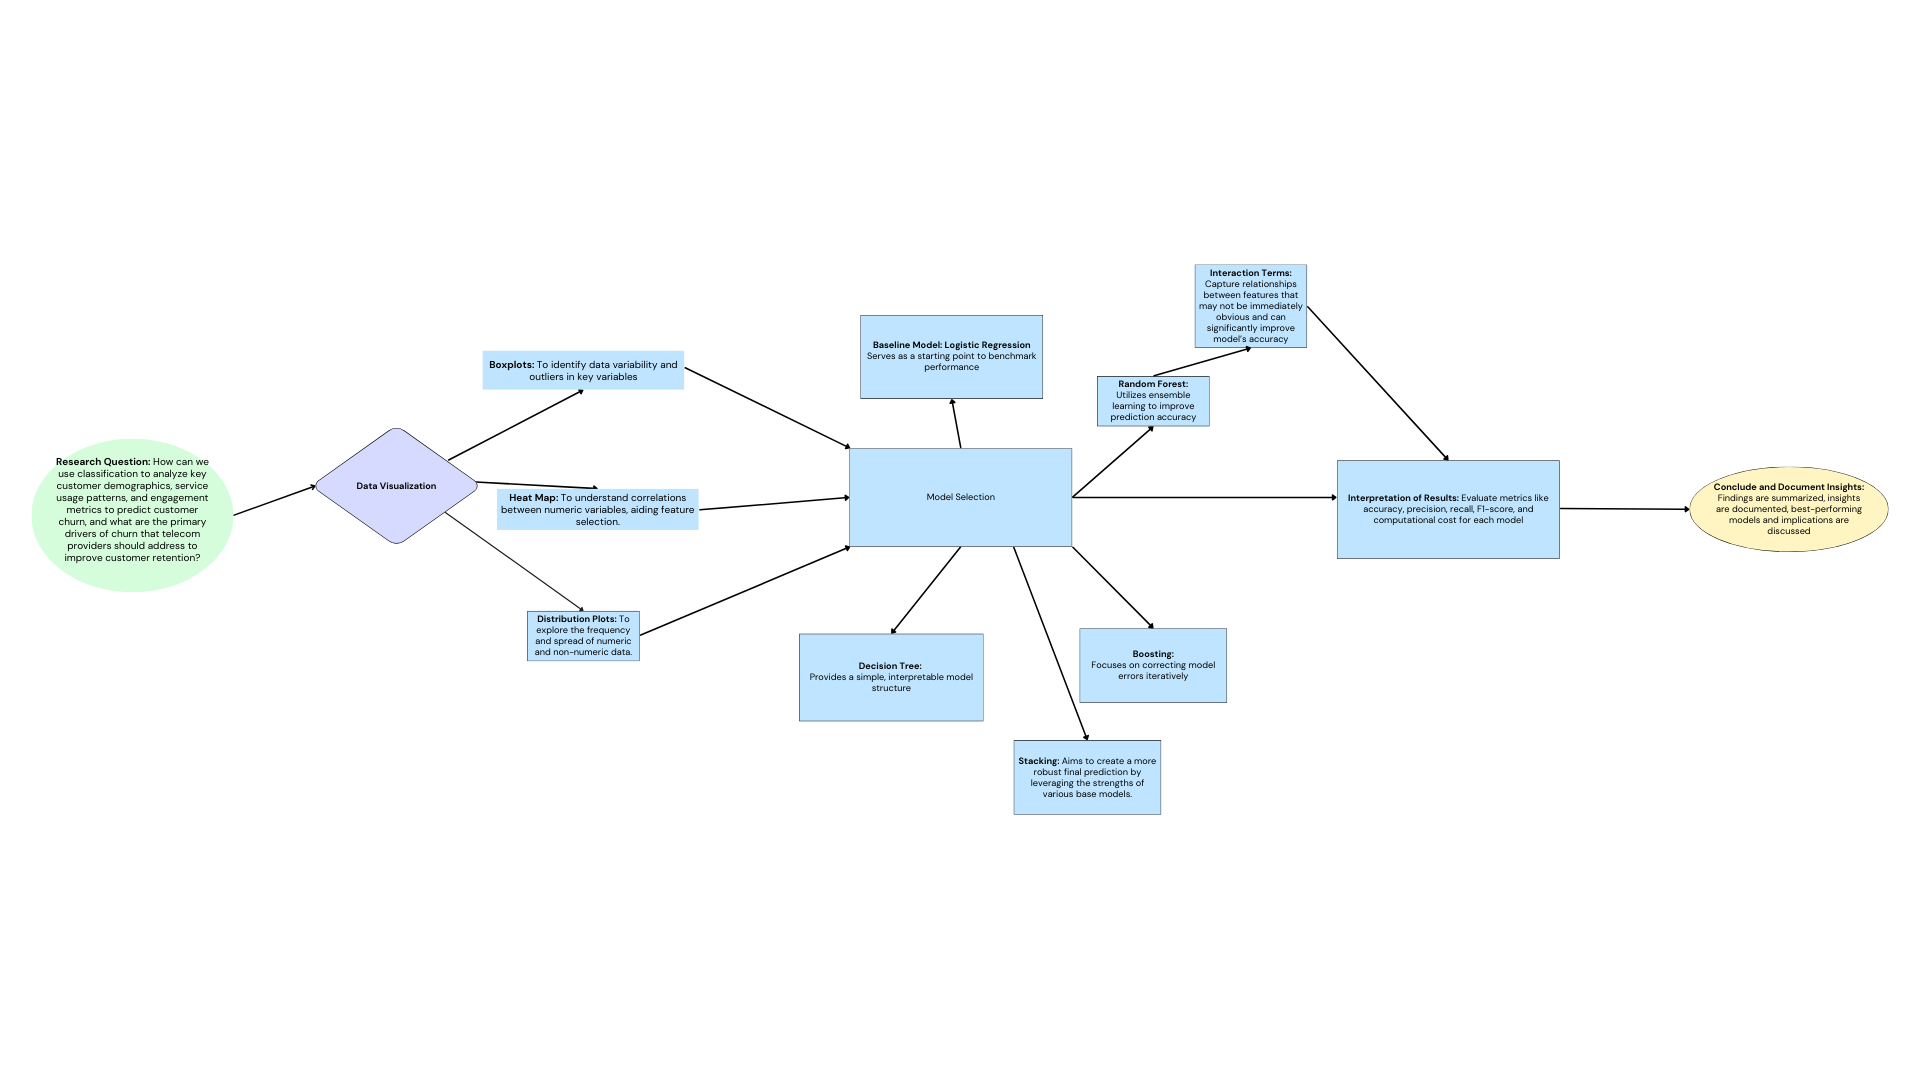

## Finalized Research Question


Based on the insights and analysis we've worked on, here’s a refined research question:

"How can we use logistic regressions to analyze key customer demographics, service usage patterns, and engagement metrics, and ultimately predict customer churn in the telecom industry, and what are the primary drivers of churn that telecom providers should address to improve customer retention?"

This research question focuses on identifying the major factors that contribute to customer churn by analyzing historical data, including customer behavior, device usage, service quality, and demographic information. The goal is to develop a predictive model (mainly a logistic regression) that can effectively pinpoint at-risk customers and the key factors driving their churn. This understanding will enable telecom providers to implement targeted retention strategies, optimize service offerings, and enhance customer satisfaction. The ultimate aim is to use these insights to maintain a competitive advantage in the market by reducing churn rates and fostering long-term customer loyalty.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier , StackingClassifier , AdaBoostClassifier , GradientBoostingClassifier
from itertools import combinations_with_replacement
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from warnings import simplefilter
simplefilter('ignore', category=FutureWarning)
simplefilter('ignore', category=pd.errors.PerformanceWarning)

In [ ]:
# Read in Data
df_holdout = pd.read_csv('cell2cellholdout.csv', encoding='utf-8', quoting=csv.QUOTE_NONE)
df_train = pd.read_csv('cell2celltrain.csv', encoding='utf-8', quoting=csv.QUOTE_NONE)

In [ ]:
df_train.head()

,"""CustomerID""","""Churn""","""MonthlyRevenue""","""MonthlyMinutes""","""TotalRecurringCharge""","""DirectorAssistedCalls""","""OverageMinutes""","""RoamingCalls""","""PercChangeMinutes""","""PercChangeRevenues""",...,"""ReferralsMadeBySubscriber""","""IncomeGroup""","""OwnsMotorcycle""","""AdjustmentsToCreditRating""","""HandsetPrice""","""MadeCallToRetentionTeam""","""CreditRating""","""PrizmCode""","""Occupation""","""MaritalStatus"""
0,3000002,"""Yes""",24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,"""4""","""No""",0,"""30""","""Yes""","""1-Highest""","""Suburban""","""Professional""","""No"""
1,3000010,"""Yes""",16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,"""5""","""No""",0,"""30""","""No""","""4-Medium""","""Suburban""","""Professional""","""Yes"""
2,3000014,"""No""",38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,"""6""","""No""",0,"""Unknown""","""No""","""3-Good""","""Town""","""Crafts""","""Yes"""
3,3000022,"""No""",82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,"""6""","""No""",0,"""10""","""No""","""4-Medium""","""Other""","""Other""","""No"""
4,3000026,"""Yes""",17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,"""9""","""No""",1,"""10""","""No""","""1-Highest""","""Other""","""Professional""","""Yes"""


In [ ]:
df_train.columns = df_train.columns.str.strip()
df_train.columns = df_train.columns.str.replace('"', '', regex=False)

In [ ]:
df_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,"""Yes""",24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,"""4""","""No""",0,"""30""","""Yes""","""1-Highest""","""Suburban""","""Professional""","""No"""
1,3000010,"""Yes""",16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,"""5""","""No""",0,"""30""","""No""","""4-Medium""","""Suburban""","""Professional""","""Yes"""
2,3000014,"""No""",38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,"""6""","""No""",0,"""Unknown""","""No""","""3-Good""","""Town""","""Crafts""","""Yes"""
3,3000022,"""No""",82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,"""6""","""No""",0,"""10""","""No""","""4-Medium""","""Other""","""Other""","""No"""
4,3000026,"""Yes""",17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,"""9""","""No""",1,"""10""","""No""","""1-Highest""","""Other""","""Professional""","""Yes"""


In [ ]:
df_train.shape

(51047, 58)

In [ ]:
# Making churn numeric
df_train['Churn'] = df_train['Churn'].str.lower().map({'"yes"': 1, '"no"': 0})

In [ ]:
# column names
train_column_names = df_train.columns.tolist()

# data type dictionary with the key as the column name and the value as the data type
dtype_dict = {col: str(dtype) for col, dtype in df_train.dtypes.items()}

## Boxplots <a id="Box-plot"></a>


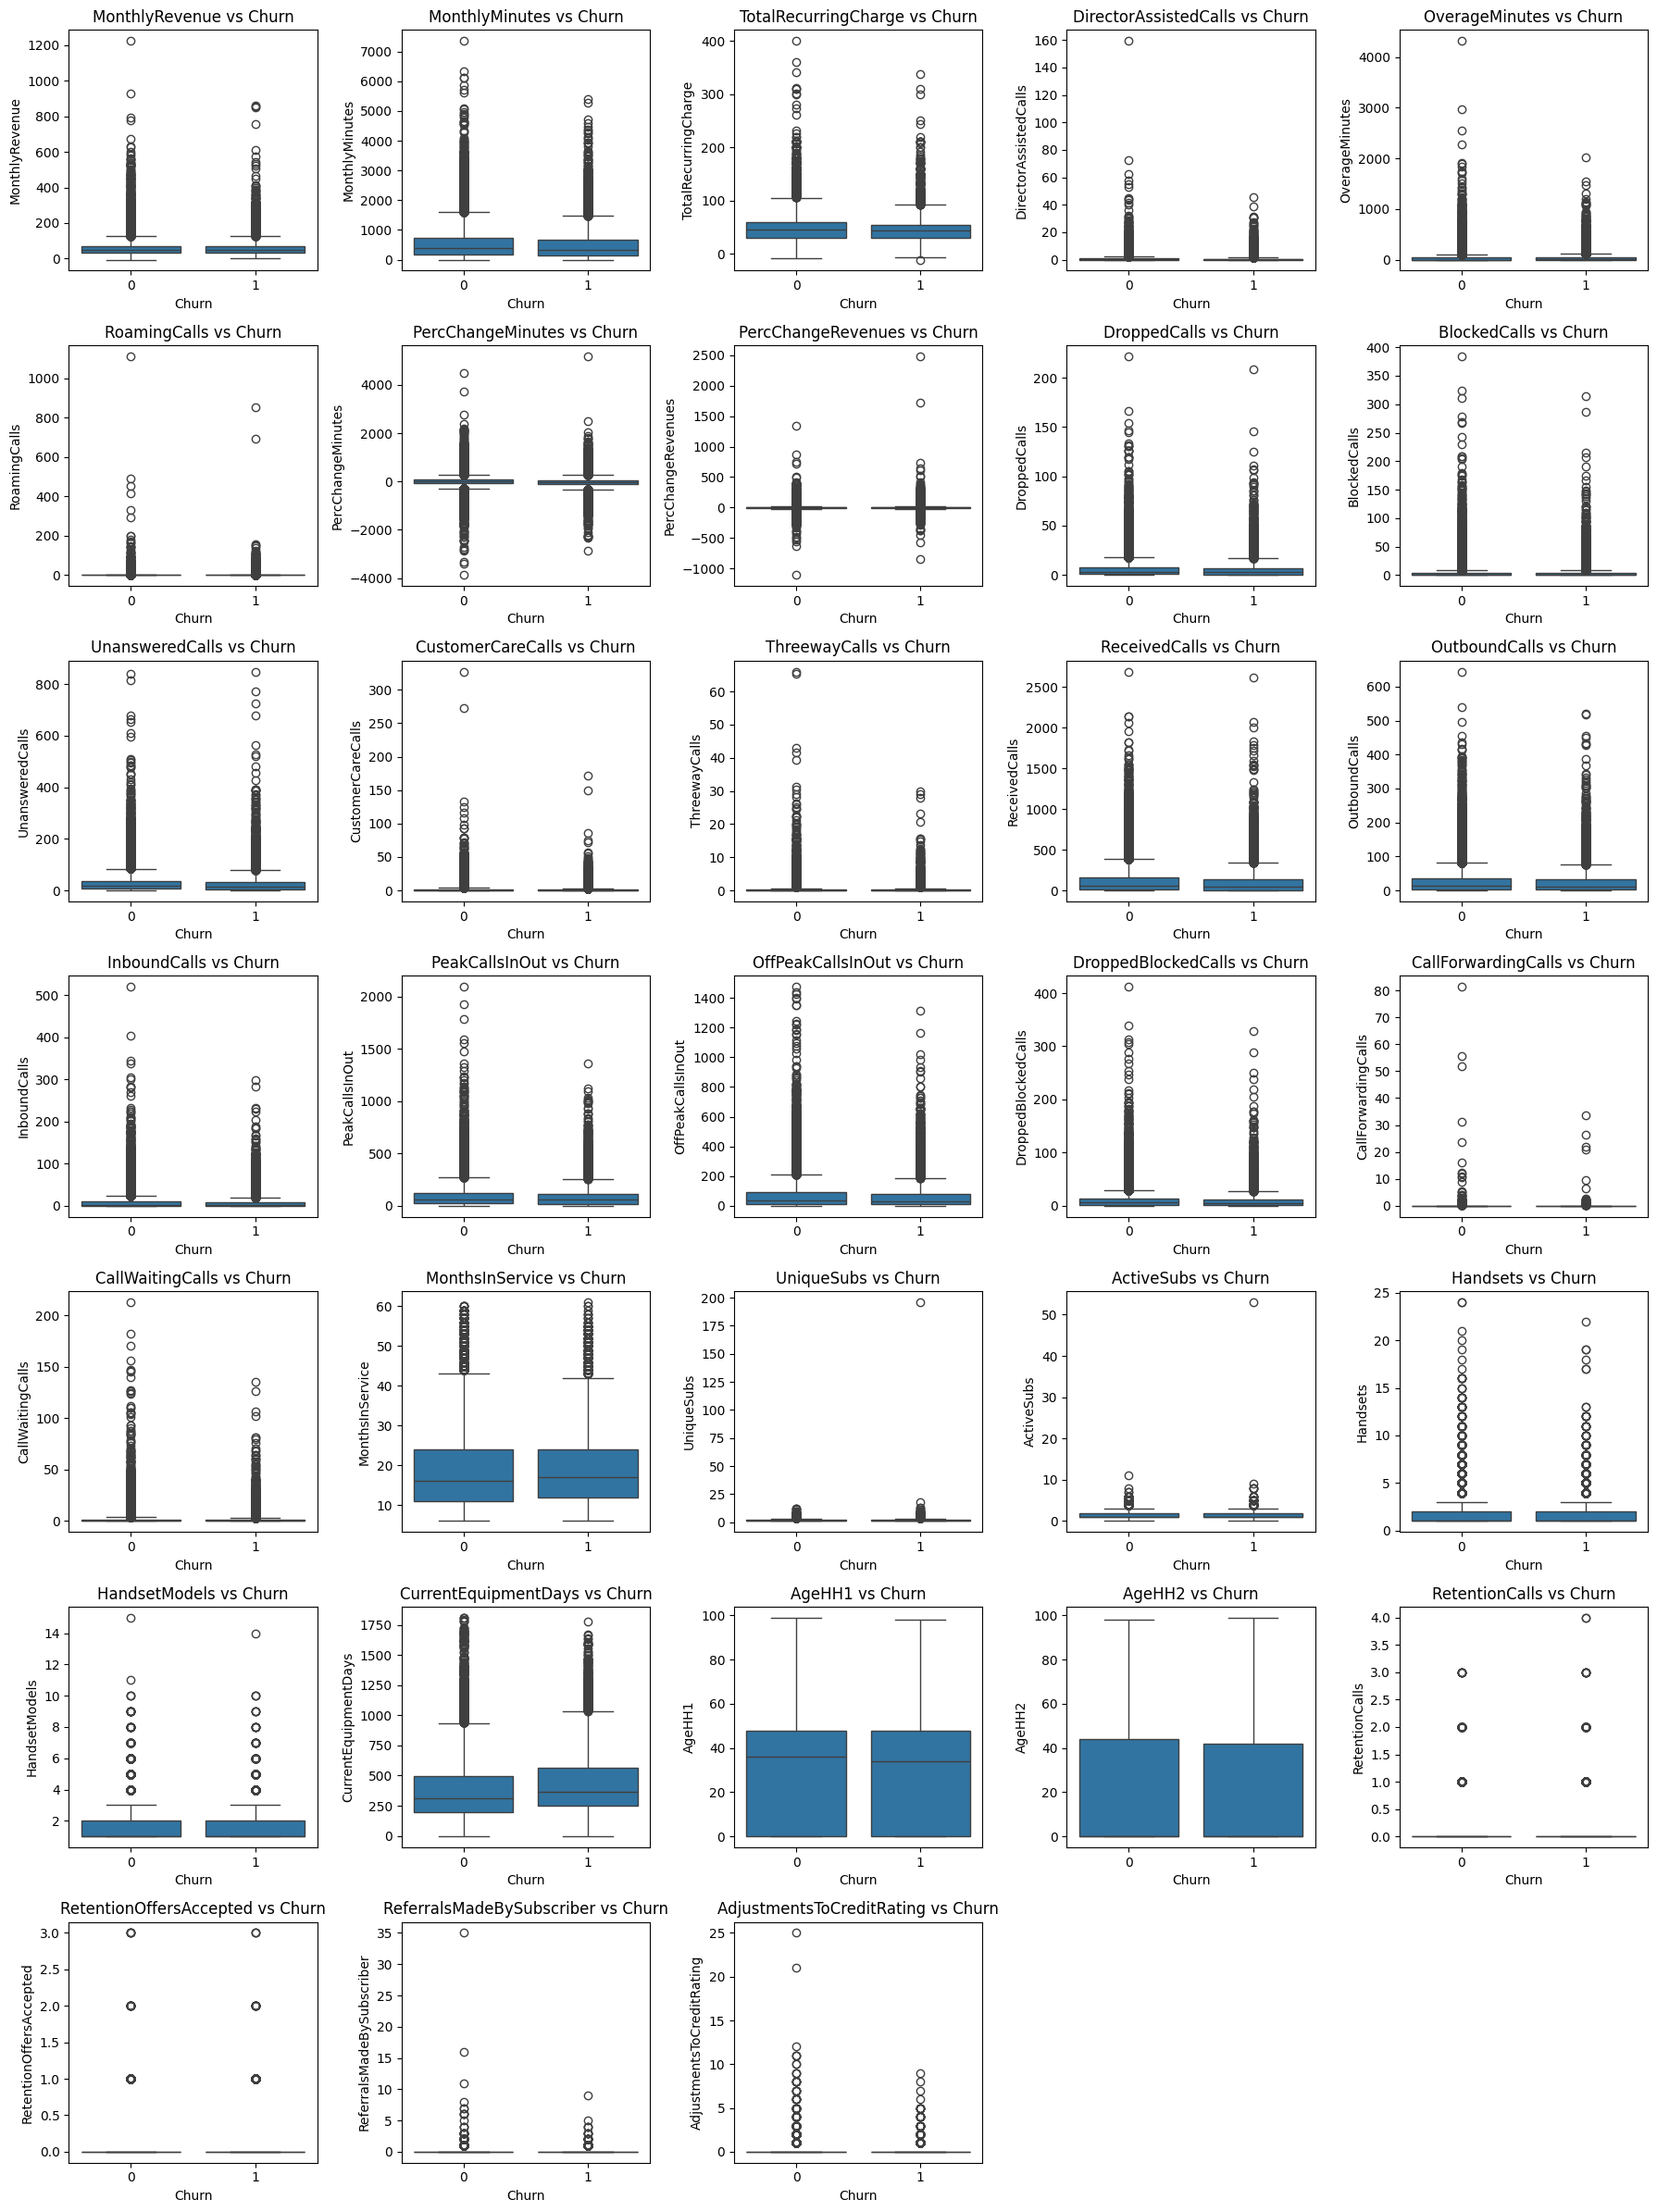

In [ ]:
# Select numeric columns from df_train and create a copy
df_numeric = df_train.select_dtypes(include=['number']).copy()
y_train = df_train['Churn']  # Target variable for the x-axis

# Drop 'Churn' and any ID or irrelevant column (assuming it's the first column)
df_numeric = df_numeric.drop(columns=['Churn', df_numeric.columns[0]])

# Set up grid dimensions for plotting
num_columns = len(df_numeric.columns)
num_rows = 7  # Set to 7 rows
num_cols = 5  # Set to 5 columns for a compact and balanced layout

# Grid plotting
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 24))  # Adjusted figsize to keep it readable and compact
axes = axes.flatten()

# Loop over each numeric column
for i, col in enumerate(df_numeric.columns):
    # Create a boxplot for each numeric column vs 'Churn'
    sns.boxplot(x=y_train, y=df_numeric[col], ax=axes[i])

    # Set plot labels and titles
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

The boxplots reveal meaningful patterns between various customer metrics and the likelihood of churn. Customers who churned generally show slightly higher values for `MonthlyRevenue`, `MonthlyMinutes`, and `TotalRecurringCharge`, which could imply that higher usage or spending may contribute to dissatisfaction, perhaps due to perceived cost versus value. Additionally, churned customers exhibit higher distributions in problematic call-related metrics, such as `DroppedCalls`, `BlockedCalls`, and `UnansweredCalls`, suggesting that poor call quality or connectivity issues could be a key driver of customer dissatisfaction. A notable increase in `CustomerCareCalls` for churned customers further indicates that frequent contact with customer support may signal unresolved frustrations that contribute to their decision to leave. Interestingly, while `CurrentEquipmentDays` (device age) does not show a strong relationship with churn, churned customers seem to have lower `RetentionCalls`, possibly reflecting limited or ineffective retention efforts. Additionally, the low values for `RetentionOffersAccepted` and `ReferralsMadeBySubscriber` suggest that customers may be disengaged from promotional and referral programs, presenting an opportunity to strengthen engagement strategies. Age demographics (`AgeHH1` and `AgeHH2`) appear to have little influence on churn, indicating that customer retention challenges may stem more from service experience than demographic factors.

## Heatmap <a id="Heatmap"></a>


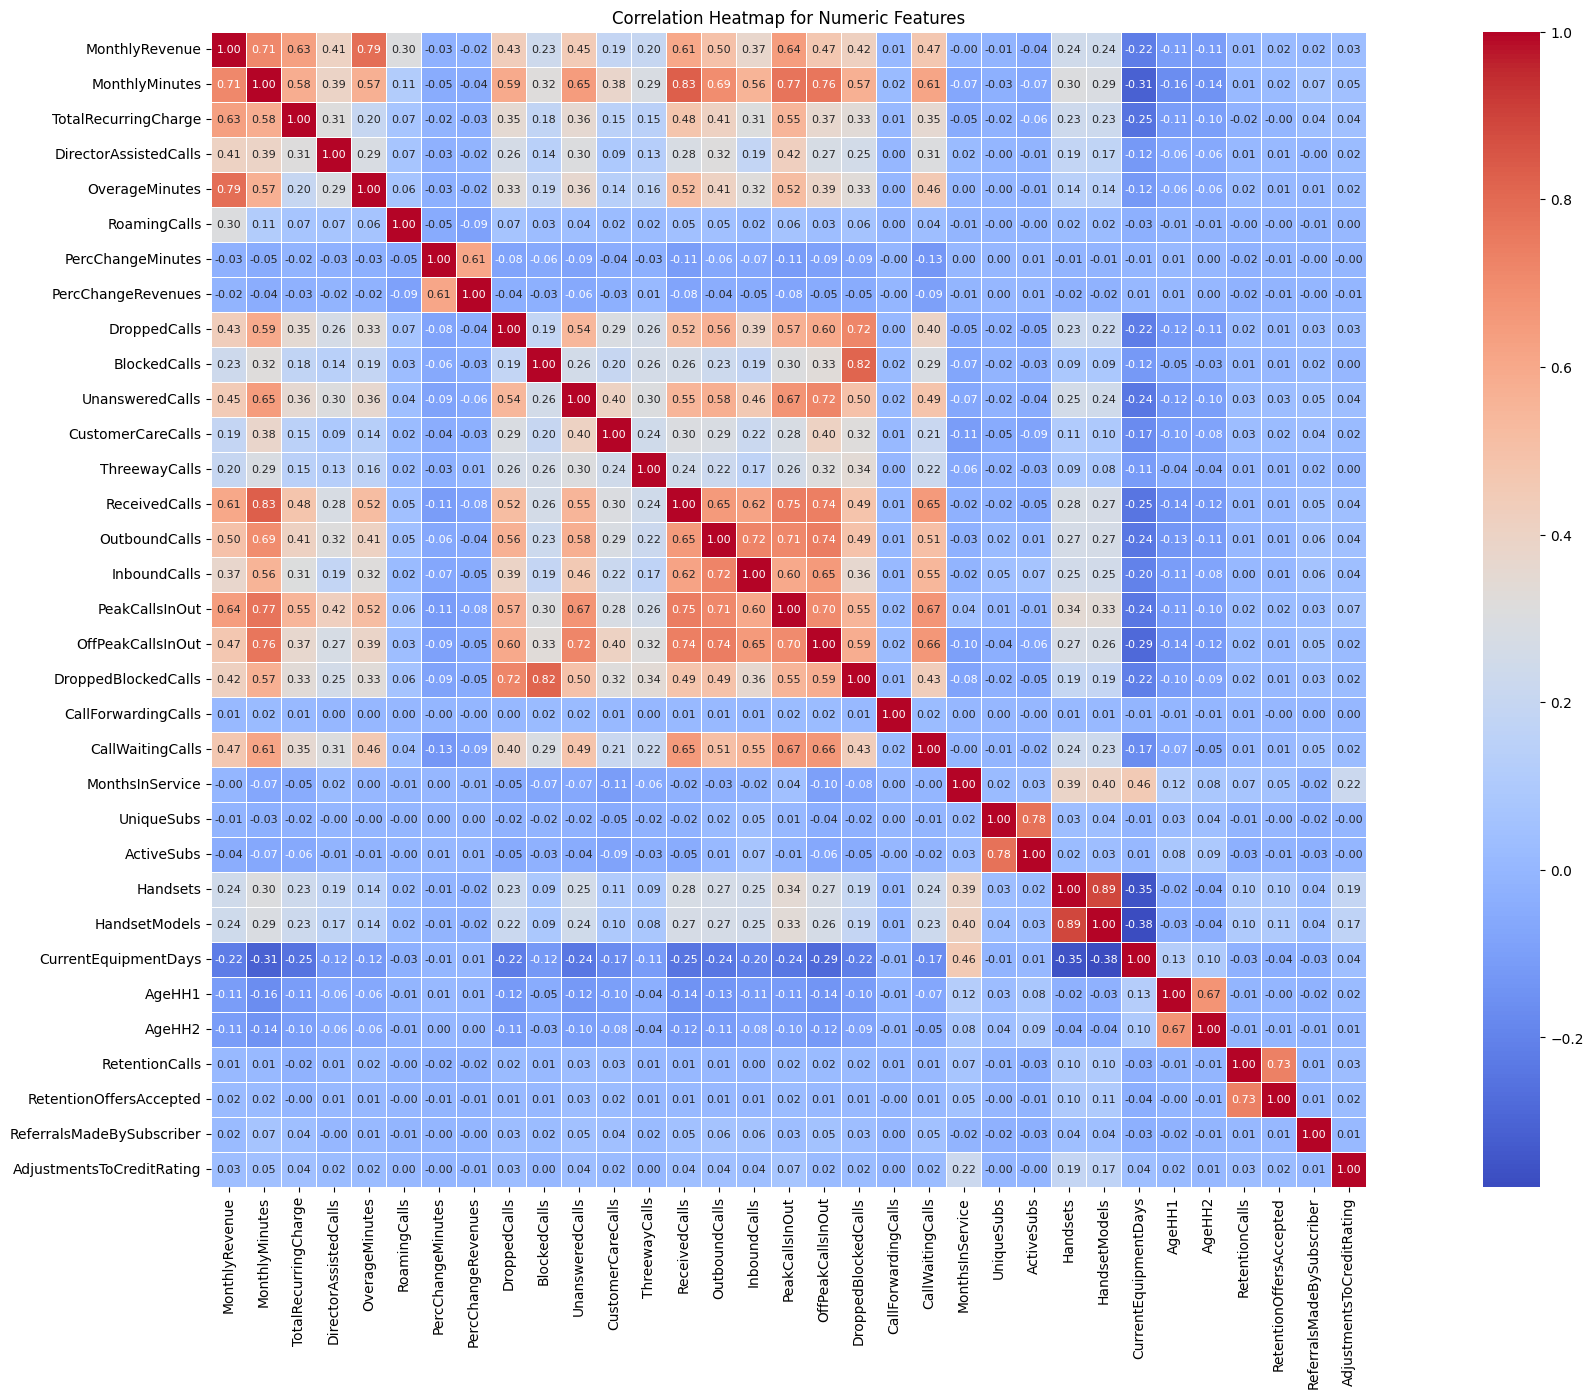

In [ ]:
# Plotting the heatmap for correlations in df_numeric
plt.figure(figsize=(30, 15))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True,
            linewidths=0.5, annot_kws={"size": 8})
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

The heatmap reveals significant insights into relationships within the dataset, highlighting patterns that could inform customer behavior analysis. For instance, `MonthlyRevenue` shows a high positive correlation with `TotalRecurringCharge` and `OverageMinutes`, suggesting that higher revenue is likely driven by recurring charges and additional usage that incurs overage fees. This insight points to a potential revenue model where consistent service fees combined with overage usage contribute substantially to overall revenue.
Additionally, call-related variables such as `OutboundCalls`, `InboundCalls`, and `ReceivedCalls` are strongly correlated with each other, implying that customers who make frequent calls in one category tend to do so across others. This cluster of call metrics may represent a segment of customers with high engagement in call-based interactions, which could be an important factor for targeting service plans tailored to heavy call users.
The negative correlation between `CurrentEquipmentDays` and `HandsetModels` suggests that customers with newer devices are more likely to have recently upgraded their handsets, possibly indicating a trend where customers with older devices are less likely to change handsets frequently. This could inform strategies for handset upgrades or promotions targeting long-time users with outdated devices.
Overall, this heatmap not only highlights how certain features are interdependent but also uncovers patterns in customer usage and spending behavior, which could be valuable for refining customer segmentation, designing targeted offerings, and enhancing revenue models.

In [ ]:
df_numeric.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating'],
      dtype='object')

## Distribution Plots (Numeric & Non-numeric) <a id="Dist"></a>

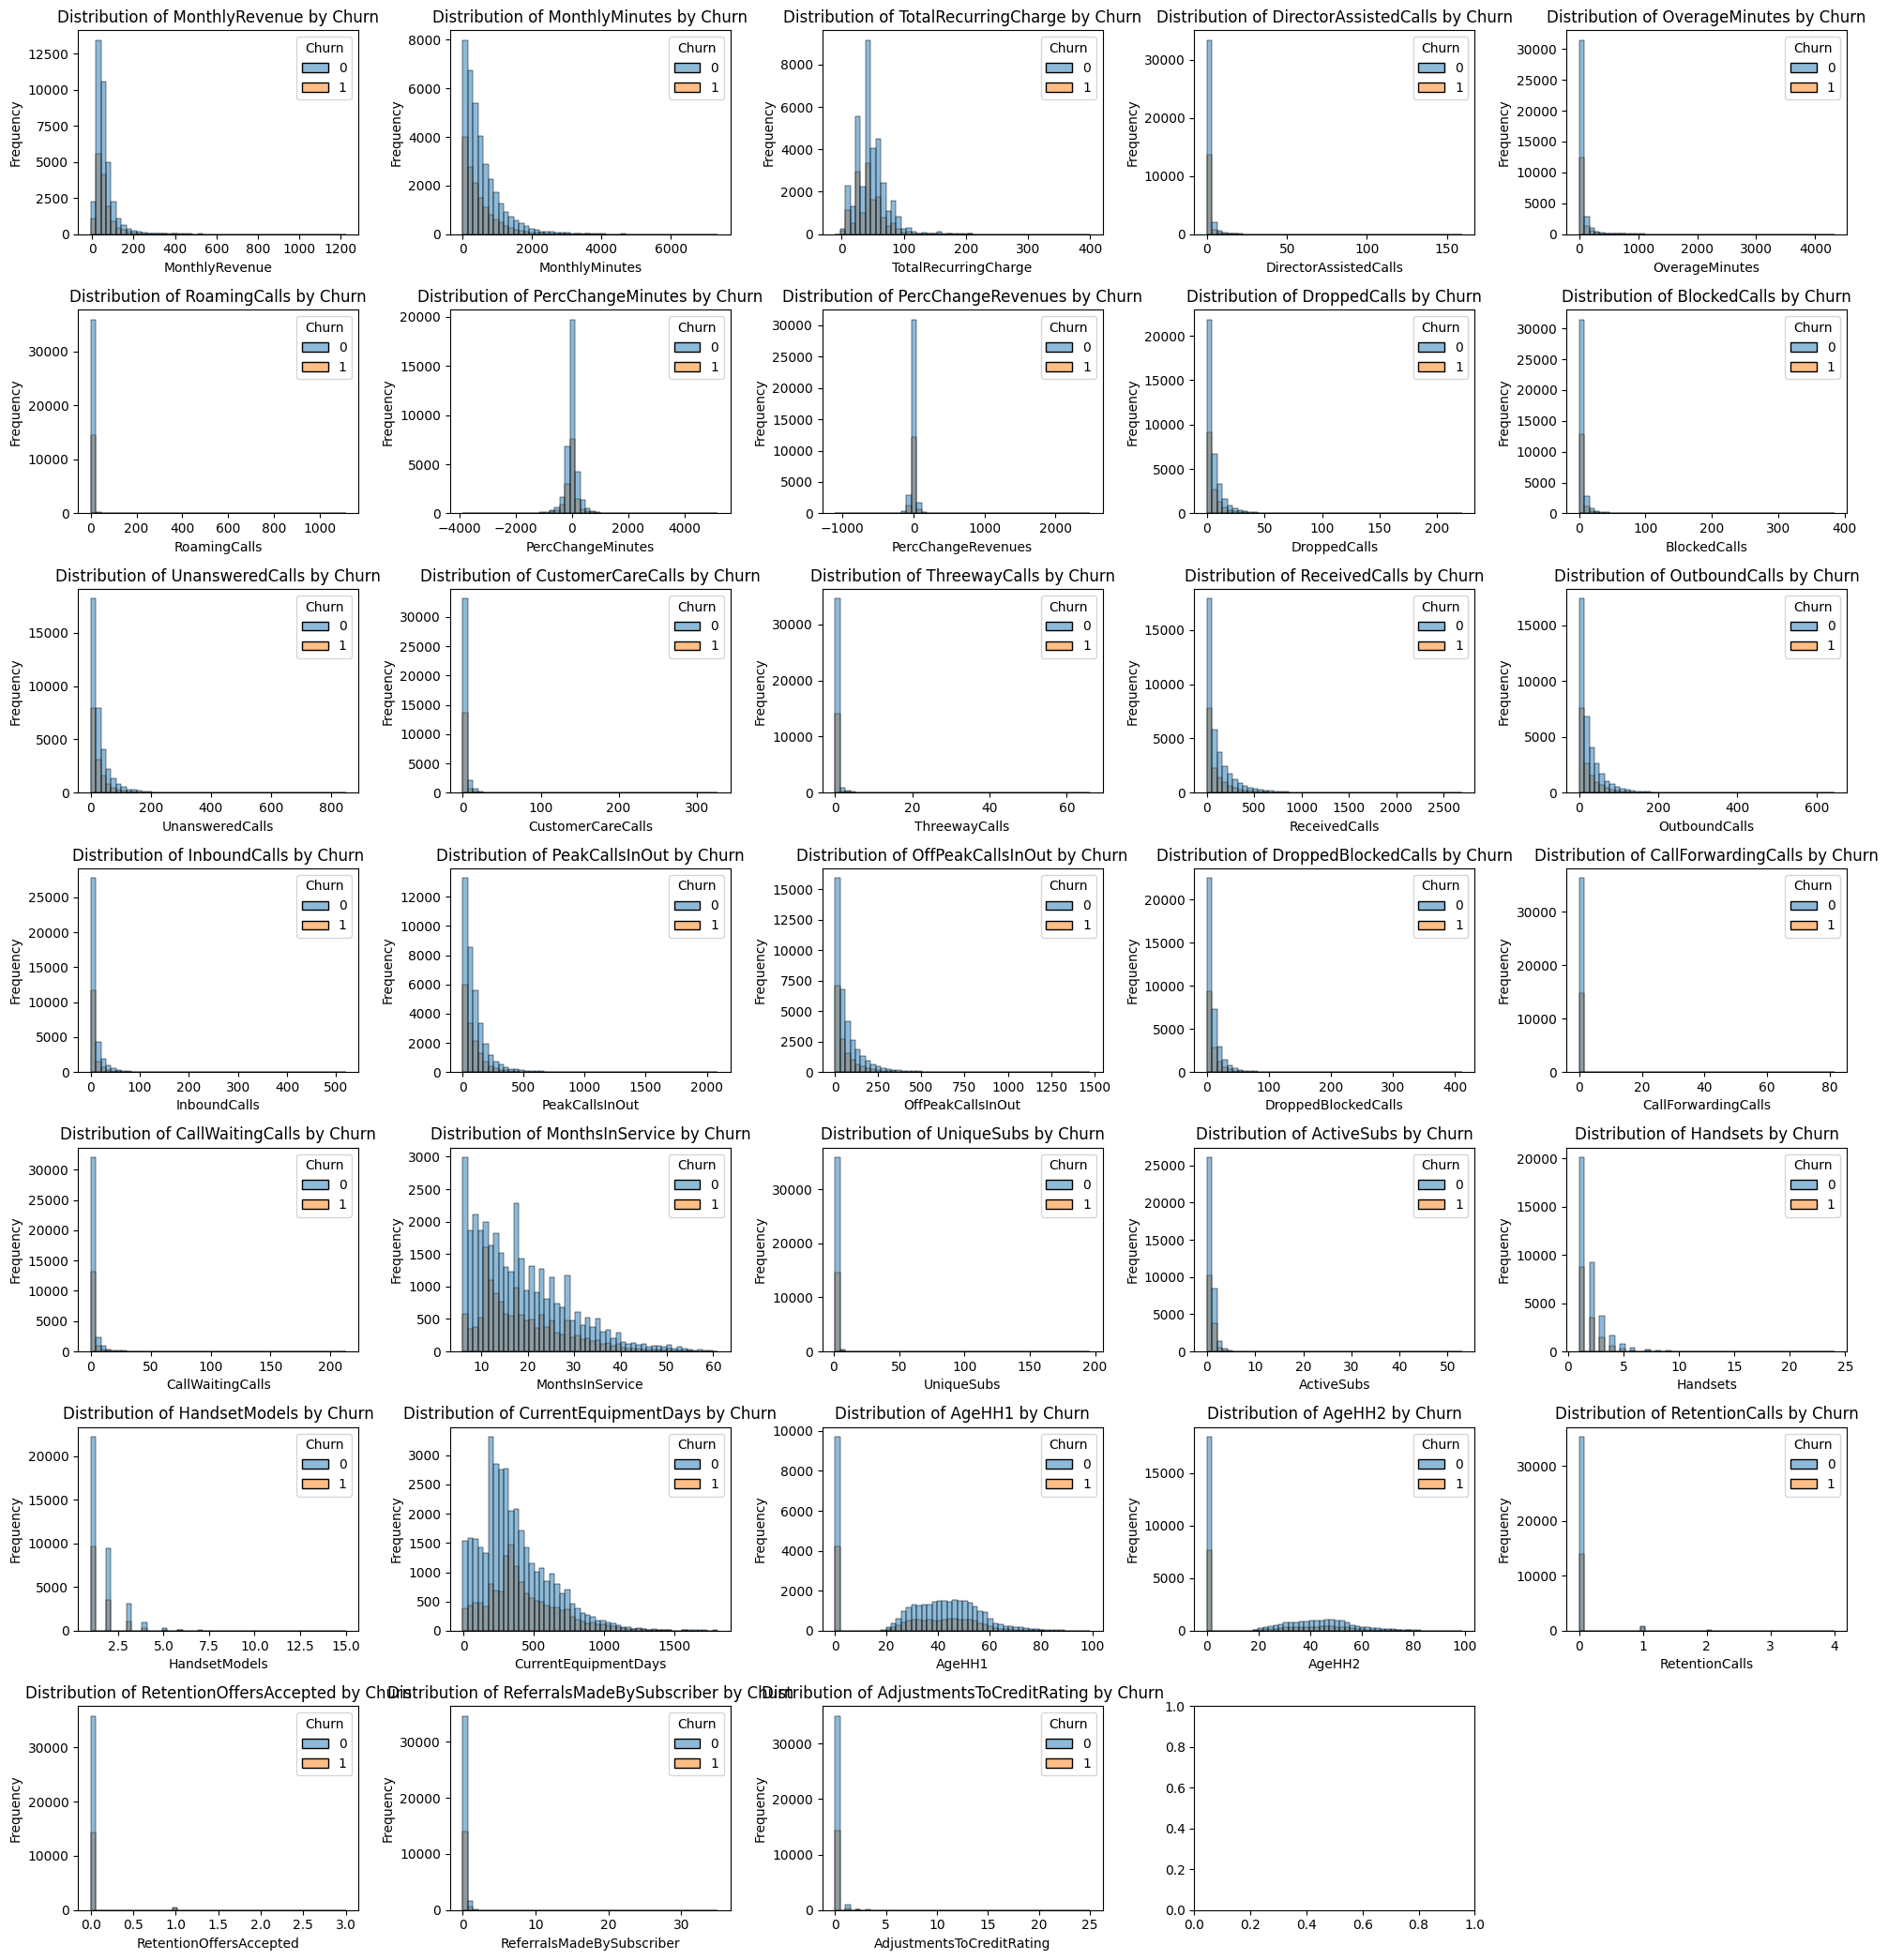

In [ ]:
plots_per_row = 5

# Make sure Churn is available as a numeric column in df_numeric
if 'Churn' not in df_numeric.columns:
    df_numeric['Churn'] = df_train['Churn'].replace({'Yes': 1, 'No': 0})

# Filter numeric columns only (excluding non-numeric)
numeric_columns = df_numeric.select_dtypes(include=['number']).columns

# Calculate the total number of numeric columns
number_of_plots = len(numeric_columns)

# Calculate the grid size
num_rows = (number_of_plots // plots_per_row) + (number_of_plots % plots_per_row != 0)

# Create subplots with a specified figure size, adjust for compactness
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 3))
axes = axes.flatten()

# Loop over each numeric column and plot
for i, col in enumerate(numeric_columns):
    if col != 'Churn':  # Skip Churn as we use it as hue
        sns.histplot(data=df_numeric, x=col, hue='Churn', ax=axes[i], kde=False, bins=50)
        axes[i].set_title(f'Distribution of {col} by Churn')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for readability
plt.tight_layout()
plt.show()

This set of visualizations shows how different customer behaviors and characteristics relate to whether a customer stays with the service (churn = 0) or leaves (churn = 1). Looking at metrics like `MonthlyRevenue`, `MonthlyMinutes`, and `TotalRecurringCharge`, we can see that customers who churn generally have slightly higher usage and spend more on average. This could mean that heavy users might feel they’re not getting enough value for the money they spend, which could lead to dissatisfaction and make them more likely to leave.
Another interesting pattern appears in metrics related to call quality, such as `DroppedCalls`, `BlockedCalls`, and `OverageMinutes`. Customers who experience more dropped or blocked calls tend to churn more often. This suggests that technical issues or unexpected fees from overage usage may frustrate customers, leading them to seek other providers. Additionally, customers who made more `CustomerCareCalls` (calls to customer service) are also more likely to churn, which might mean that repeated interactions with support don’t always resolve their issues. In other words, customers who need help frequently may feel their concerns aren’t being addressed, pushing them to switch to a competitor.
We also see that `MonthsInService`—the time a customer has been with the service—tends to be higher for those who don’t churn. This could indicate that long-term customers are more loyal or simply find it less convenient to switch providers. Meanwhile, factors like age (represented by `AgeHH1` and `AgeHH2`) don’t seem to have a big impact on churn, suggesting that customer experience factors are more influential than demographics in this dataset.
Finally, metrics like `RetentionCalls`, `RetentionOffersAccepted`, and `ReferralsMadeBySubscriber` are low across the board, meaning that few customers are actively engaged in retention activities or referrals. This could signal that promotional or retention efforts aren’t as effective or appealing as they could be. Improving these programs to better address customer needs and incentivize loyalty could be a way to reduce churn. Overall, it seems that customer dissatisfaction—whether due to service quality issues, lack of support, or cost concerns—is a common theme among those who leave.

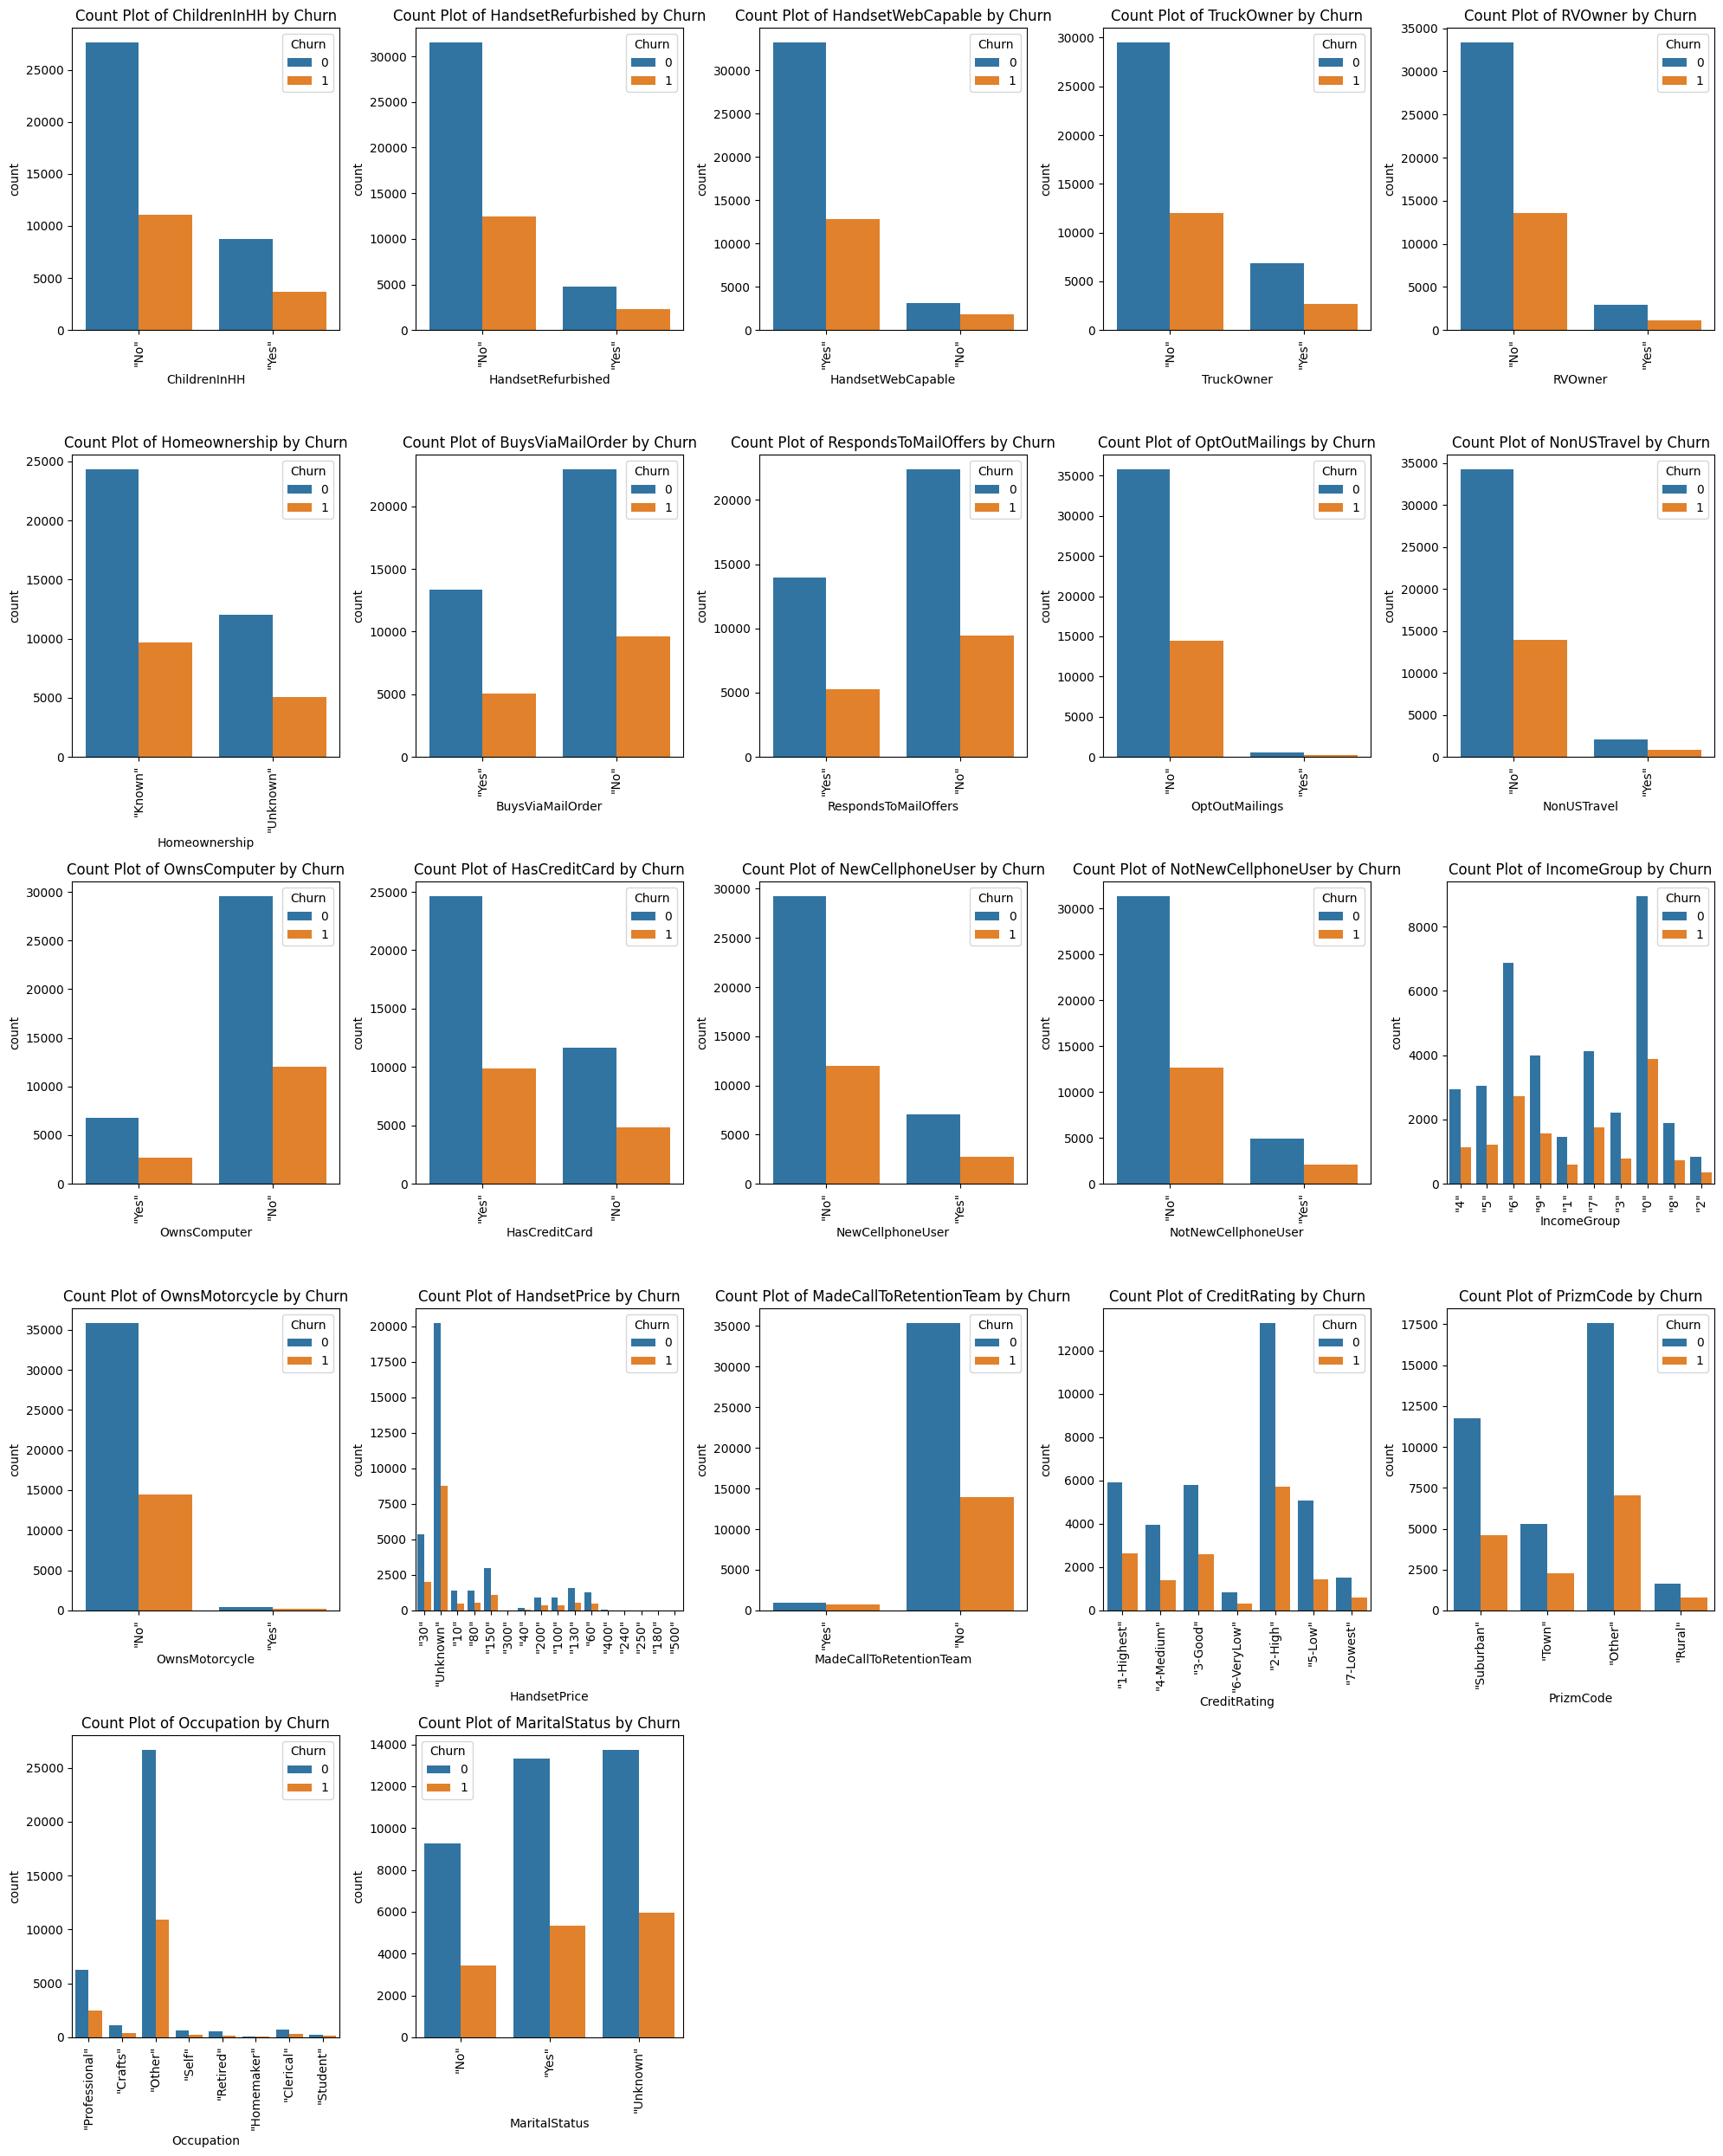

In [ ]:
plots_per_row = 5

# Filter categorical columns, excluding "Service Area"
categorical_columns = df_train.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop("ServiceArea", errors="ignore")

# Calculate the total number of categorical columns after exclusion
number_of_plots = len(categorical_columns)

# Calculate the grid size
num_rows = (number_of_plots // plots_per_row) + (number_of_plots % plots_per_row != 0)

# Create subplots with a specified figure size
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Loop over each categorical column and plot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df_train[col], hue=df_train['Churn'], ax=axes[i])
    axes[i].tick_params(axis='x', labelrotation=90)
    axes[i].set_title(f'Count Plot of {col} by Churn')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plots
plt.tight_layout()
plt.show()

This set of count plots shows how various categorical features relate to customer churn, with blue bars representing non-churned customers (`Churn=0`) and orange bars representing churned customers (`Churn=1`). By examining the distribution across different categories, we can identify patterns that may contribute to customer churn.
For instance, device-related features, such as `HandsetRefurbished` and `HandsetWebCapable`, reveal that churned customers are more likely to have non-refurbished devices and are less likely to use web-capable handsets. This pattern suggests that customers with older or limited-functionality handsets may feel less satisfied and are thus more likely to leave the service. In addition, we observe that customers who do not own a `PCOwner` are more likely to churn, potentially indicating that customers who rely less on technology are less engaged with the service overall.
When looking at factors related to customer lifestyle and service usage, such as `MaritalStatus` and `Homeownership`, customers who are married and own a home appear less likely to churn compared to other groups. This could indicate that these customers might be more stable or financially secure, making them less likely to switch providers. Additionally, features like `BuyViaMailOrder` and `OwnsMotorcycle` show that customers who do not engage in these activities are more likely to churn. These patterns may suggest that customers who are generally less involved in purchasing or using additional services may have lower engagement with the provider’s offerings, potentially influencing their decision to leave.
Employment and financial-related features, such as `IncomeGroup`, `CreditRating`, and `PrizmCode`, also show notable differences between churned and non-churned customers. For example, customers with higher income groups and better credit ratings are less likely to churn, which could imply that financially stable customers may be more loyal or find the service to be affordable. Similarly, specific `PrizmCode` segments—likely reflecting geographic or demographic classifications—indicate certain areas or groups are more prone to churn, which might highlight regional or socioeconomic differences in customer satisfaction.
Lastly, features like `Occupation` and `MaritalStatus` provide additional insights into customer demographics. Certain occupations appear to have higher churn rates, suggesting that professional or lifestyle factors may influence the likelihood of leaving the service. For example, customers in certain occupational groups might have specific needs or expectations that the service may not be meeting, prompting them to switch providers. Overall, these patterns indicate that both lifestyle factors and technology preferences play a role in customer retention, and tailoring services or support to align with these customer segments may help reduce churn.


## Selecting a Baseline Model <a id="Baseline"></a>

We tried out 3 potential baseline models for the prediction of `Churn`. In this section, we implement each dataset on the processed data and interpret the results.  

### Logistic Regression

In [ ]:
# read in processed Data
processed_data = pd.read_csv('/content/processed_cell2celltrain.csv')

processed_data = processed_data.dropna()

for col in processed_data.columns:
  if "Unnamed: " in col:
    processed_data = processed_data.drop(columns=[col])

X = processed_data.drop(columns=['Churn'])
y = processed_data['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)


In [ ]:
# logreg initialization
logreg = LogisticRegression(penalty='l2', max_iter=1000, random_state=109, n_jobs=-1, class_weight='balanced').fit(X_train, y_train)

# predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# classification report
logreg_classification_report = classification_report(y_test, y_test_pred)
print(logreg_classification_report)
print(f"Recall: {recall_score(y_test , y_test_pred)}")
print(f"F1: {f1_score(y_test , y_test_pred)}")


              precision    recall  f1-score   support

           0       0.78      0.60      0.68      7158
           1       0.35      0.55      0.43      2793

    accuracy                           0.59      9951
   macro avg       0.56      0.58      0.55      9951
weighted avg       0.66      0.59      0.61      9951

Recall: 0.5531686358754028
F1: 0.430062630480167


#### Interpretation of the Logistic Regression's results

The classification report reveals that the model's performance varies significantly between the two classes. For class `0` (Customers who don't churn), the precision is 0.78, indicating that 78% of instances predicted as `0` are correct, while the recall is 0.60, showing the model identifies only 60% of the actual `0` instances. This results in an F1-score of 0.67, demonstrating moderately balanced performance for this class. For class `1` (Customers who churn), the model achieves a precision of 0.35, meaning only 35% of predicted `1`s are correct, but a higher recall of 0.56, indicating it correctly identifies 56% of actual `1`s. The F1-score for class `1` is 0.43, suggesting some ability to identify the minority class but with notable trade-offs in precision.

The overall accuracy is 59%, which may appear modest but reflects the challenge of predicting both classes in an imbalanced dataset. The macro average F1-score of 0.55 highlights that the model struggles to balance its performance across both classes, while the weighted average F1-score of 0.61 shows the influence of the majority class on overall performance. These results indicate that while the model has improved recall for the minority class compared to previous cases, its precision for that class remains low. This suggests a need for further fine-tuning, such as addressing class imbalance through techniques like oversampling or undersampling, adjusting the decision threshold, or trying alternative models with better capabilities to balance precision and recall across both classes.

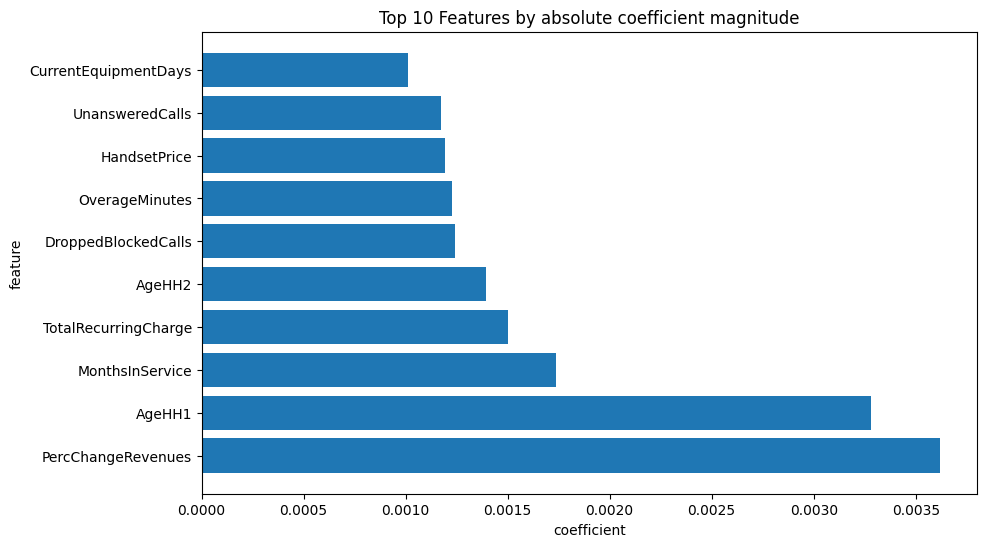

In [ ]:
# coefficients
coefficients = abs(logreg.coef_[0])
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)

# top feature visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Coefficient'][:10])
plt.title('Top 10 Features by absolute coefficient magnitude')
plt.xlabel('coefficient')
plt.ylabel('feature')
plt.show()

This bar chart shows the top 10 features by absolute coefficient magnitude from a logistic regression model, suggesting the importance of these features in predicting the target variable. The x-axis represents the magnitude of the coefficients, and the y-axis lists the features in descending order of importance. `PercChangeRevenues` is the most significant predictor, with the highest absolute coefficient. Looking at the coefficients ranked by magnitude gives us a good idea of model selections. Should we move further with this model, tools like lasso can help us narrow down on the optimum combination of predictors.

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'max_iter': [1000]
}

grid_search = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=109),
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_logreg = grid_search.best_estimator_

# Predictions with the best model
y_train_pred = best_logreg.predict(X_train)
y_test_pred = best_logreg.predict(X_test)

# Classification Report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67      7158
           1       0.35      0.58      0.44      2793

    accuracy                           0.58      9951
   macro avg       0.57      0.58      0.55      9951
weighted avg       0.66      0.58      0.60      9951



#### Final Thoughts on the Logistic Regression


We attempted to use grid_search to improve the accuracy of the Logistic Regression which was 0.13 points below the naive model. However, our implementation resulted in roughly the same output, save for minor changes in recall. We will likely not proceed with the logistic regression model, and spring for models that are more accurate.

### Decision Tree

Optimal Decision Tree Accuracy: 0.71


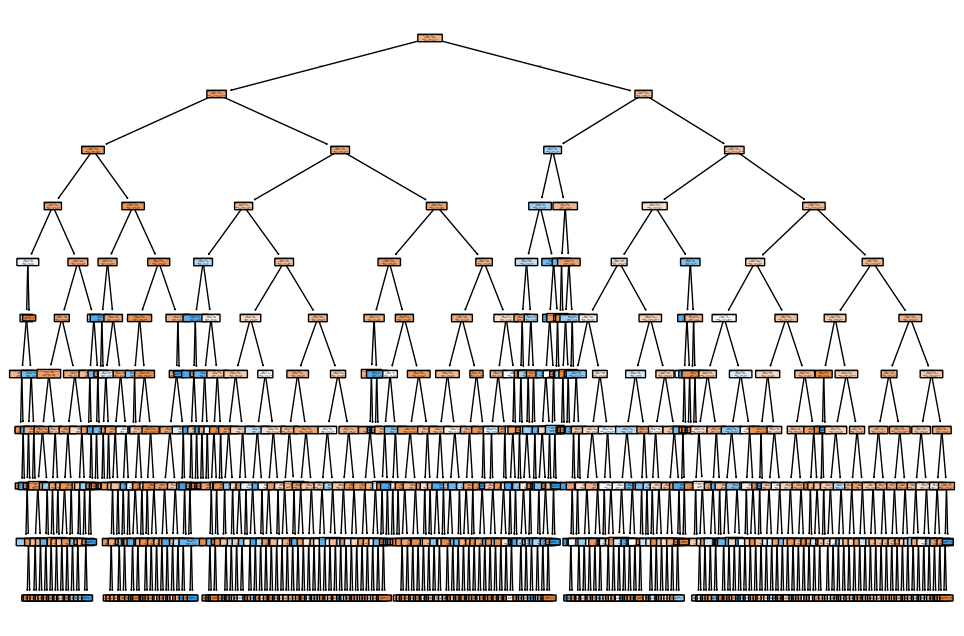

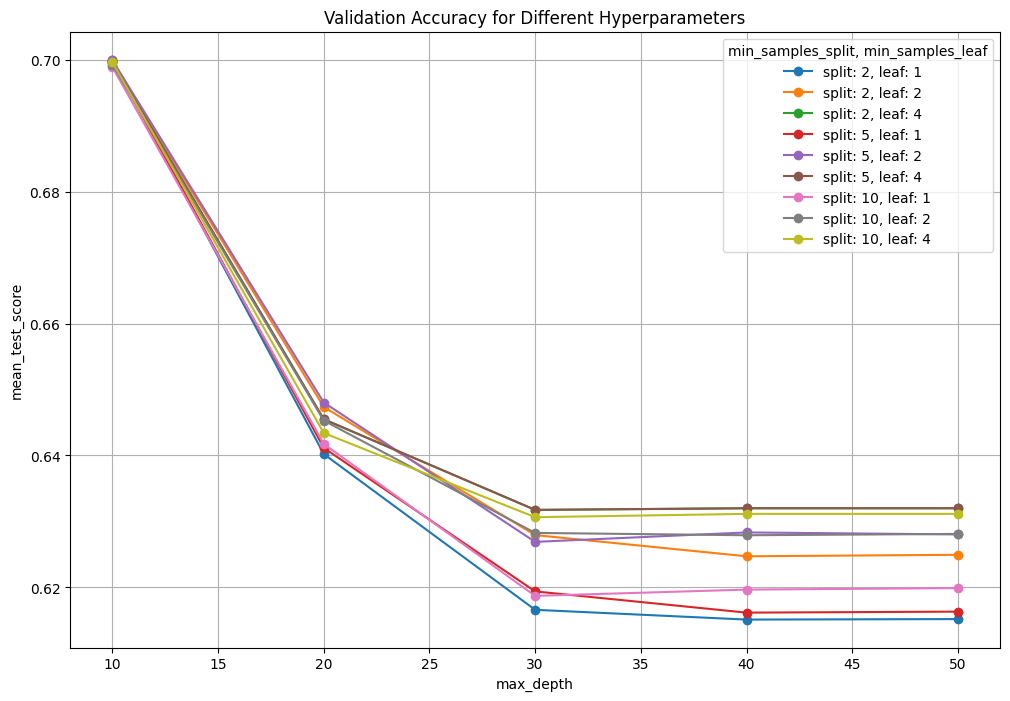

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the decision tree model with gini criterion
tree_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Use GridSearchCV to find the optimal parameters
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
optimal_tree = grid_search.best_estimator_
optimal_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = optimal_tree.predict(X_test)

# Calculate accuracy of the optimal model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimal Decision Tree Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(optimal_tree, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'], rounded=True)
plt.show()

# Extract the results from the grid search
results = grid_search.cv_results_

# Get the mean test scores for each hyperparameter combination
mean_test_scores = results['mean_test_score']

# Get the hyperparameter values
param_max_depth = results['param_max_depth'].data
param_min_samples_split = results['param_min_samples_split'].data
param_min_samples_leaf = results['param_min_samples_leaf'].data

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'max_depth': param_max_depth,
    'min_samples_split': param_min_samples_split,
    'min_samples_leaf': param_min_samples_leaf,
    'mean_test_score': mean_test_scores
})

plt.figure(figsize=(12, 8))
for (min_samples_split, min_samples_leaf), group in results_df.groupby(['min_samples_split', 'min_samples_leaf']):
    plt.plot(group['max_depth'], group['mean_test_score'], marker='o', label=f'split: {min_samples_split}, leaf: {min_samples_leaf}')

plt.title('Validation Accuracy for Different Hyperparameters')
plt.xlabel('max_depth')
plt.ylabel('mean_test_score')
plt.legend(title='min_samples_split, min_samples_leaf')
plt.grid(True)
plt.show()


In [ ]:
print(optimal_tree)

dt_pred = optimal_tree.predict(X_test)
print(classification_report(y_test , dt_pred))
print(f"Recall: {recall_score(y_test , dt_pred)}")
print(f"F1: {f1_score(y_test , dt_pred)}")

DecisionTreeClassifier(max_depth=10, random_state=42)
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      7158
           1       0.45      0.11      0.18      2793

    accuracy                           0.71      9951
   macro avg       0.59      0.53      0.50      9951
weighted avg       0.65      0.71      0.65      9951

Recall: 0.11493018259935553
F1: 0.18337617823479005


#### Interpretation of the Decision Tree's results

Looking at the results from the decision tree and plotting the validation accuracy for the different hyperparameters, we can see that the small the depth value, the greater the accuracy. However, that accuracy is still extremely low, seeing that the highest value is at 0.70 and only lowers from there.

#### Final Thoughts on the Decision Tree
Decision tree resulted in the second highest validation accuracy, so we will not be using this as our base model. Especially because the value keep decreasing dramatically as the depth increases.

### Random Forest

In order to find the appropriate parameters for our random forest model we can use GridSearchCV to simultaneously check parameters and perform cross-validation.

\
Note that the below code is commented because since we are not performing predictor-selection/re-training for Milestone 4, the GridSearchCV training uses all predictors and thus takes a very long time, so we found the appropriate parameters and then simply performed a 10-fold CV using those parameters below.

In [ ]:
# param_grid = {
#     "n_estimators": [100 , 200 , 300],
#     "max_depth": [10 , 20 , 30],
#     "min_samples_split": [2 , 5],
#     "min_samples_leaf": [1 , 2 , 4],
#     "max_features": ["sqrt" , "log2"]
# }

# grid_search_rf = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=109 , class_weight="balanced" , oob_score=True),
#     param_grid=param_grid,
#     cv=10,
#     scoring="accuracy",
#     n_jobs=-1,
#     verbose=1
# )

# grid_search_rf.fit(X_train , y_train)

# best_rf = grid_search_rf.best_estimator_
# best_rf_params = grid_search_rf.best_params_

Below is the 10-Fold CV using the appropriate RandomForestClassifier parameters.

In [ ]:
random_forest = RandomForestClassifier(random_state=109 , class_weight="balanced" , oob_score=True,
                            n_estimators=200 , max_depth=30 , min_samples_split=2,
                            min_samples_leaf=1)
cv = cross_validate(random_forest , X_train , y_train , cv=10 , return_train_score=True)

Next we will analyze the mean cross-validation accuracy to determine how well this model performed. As well, we will analyze the train accuracy to try and identify any discrepancies or overfitting.

In [ ]:
print(f"Mean CV Accuracy: {cv['test_score'].sum() / len(cv['test_score'])}")

# Same model as above, but trained on all data
rf_general = RandomForestClassifier(random_state=109 , class_weight="balanced" , oob_score=True,
                            n_estimators=200 , max_depth=30 , min_samples_split=2,
                            min_samples_leaf=1).fit(X_train , y_train)

print(f"Train Accuracy: {rf_general.score(X_train , y_train)}")

Train Accuracy: 1.0


As we can see, the train accuracy is much higher than the validation accuracy found using cross-validation meaning the model is likely overfitting the data. This also means we may see an even lower test accuracy.

Lastly, we will run `classification_report` to get a general analysis of the model on the train dataset. We will use the test dataset now (as opposed to previously) since at this point we have completed model tuning and selection and want to get the final evaluation of this model.

In [ ]:
rf_pred = rf_general.predict(X_test)
print(classification_report(y_test , rf_pred))
print(f"Recall: {recall_score(y_test , rf_pred)}")
print(f"F1: {f1_score(y_test , rf_pred)}")

              precision    recall  f1-score   support

           0       0.73      0.98      0.84      7158
           1       0.56      0.06      0.11      2793

    accuracy                           0.72      9951
   macro avg       0.64      0.52      0.47      9951
weighted avg       0.68      0.72      0.63      9951

Recall: 0.06265664160401002
F1: 0.1126488574187319


#### Interpretation of the Random Forest's results

From the Random Forest model's CV score we can determine that the model is likely overfitting, which we may be able to improve by reducing the features used after analyzing the feature importances or by testing out and evaluating the importance of interactions terms which can be used to improve the final model.

We should also note that the test evaluation's f1-score for the positive class (Churn=Yes) is very low indicating that this model predicts the positive class very poorly, which as we have discussed, is likely due to overfitting on the negative class which we will try to address in the final model.

#### Final Thoughts on the Random Forest

Since Random Forest displays the highest cross validation accuracy of the models tested, we will select random forest as our baseline model and focus on improving it for our final model. We will test our reducing the number of predictors used based on feature importances, introducing interaction terms, testing boosting methods, and potentially other methods to improve generalization.

#Boosting

In order to further address the data we will try AdaBoost and Gradient Boosting to see if we can find better results. After this we will further address this by using a stacking model to combine the random forest and boosting results.

In [ ]:
# AdaBoost

# Commented to save time
# ada_param_grid = {
#     "n_estimators": [50 , 100 , 200],
#     "learning_rate": [0.99 , 0.995 , 1],
# }

# ada_grid = GridSearchCV(AdaBoostClassifier(random_state=109) , param_grid=ada_param_grid , cv=5 , verbose=1)
# ada_grid.fit(X_train , y_train)

# adaBoost = ada_grid.best_estimator_
adaBoost = AdaBoostClassifier(learning_rate=0.99 , n_estimators=200 , random_state=109).fit(X_train , y_train)

print(f"Ada Train Acc: {adaBoost.score(X_train , y_train)}")
print(f"Ada Test Acc: {adaBoost.score(X_test , y_test)}")

ada_pred = adaBoost.predict(X_test)
print(classification_report(y_test , ada_pred))
print(f"Recall: {recall_score(y_test , ada_pred)}")
print(f"F1: {f1_score(y_test , ada_pred)}")

Ada Train Acc: 0.7229215346348081
Ada Test Acc: 0.7222389709576927
              precision    recall  f1-score   support

           0       0.73      0.96      0.83      7158
           1       0.52      0.11      0.19      2793

    accuracy                           0.72      9951
   macro avg       0.63      0.54      0.51      9951
weighted avg       0.68      0.72      0.65      9951

Recall: 0.11242391693519513
F1: 0.18514150943396226


From these results we can see that the AdaBoost classifier performs near (but below) the random forest classifier.

In [ ]:
# Gradient Boosting

# This took so very long, the default parameters give a higher accuracy compared to the models we were able to train
# grad_param_grid = {
#     "n_estimators": [50 , 100 , 200],
#     "learning_rate": [0.1 , 0.15 , 0.5],
#     "criterion": ["friedman_mse", "squared_error"],
#     "min_samples_split": [2 , 4],
#     "min_samples_leaf": [1 , 2 , 3],
#     "max_depth": [2 , 3 , 4]
# }

# grad_grid = GridSearchCV(GradientBoostingClassifier(random_state=109) , param_grid=grad_param_grid , cv=5 , verbose=1)
# grad_grid.fit(X_train , y_train)

gradBoost = GradientBoostingClassifier(random_state=109).fit(X_train , y_train)

print(f"Grad Train Acc: {gradBoost.score(X_train , y_train)}")
print(f"Grad Test Acc: {gradBoost.score(X_test , y_test)}")

grad_pred = gradBoost.predict(X_test)
print(classification_report(y_test , grad_pred))
print(f"Recall: {recall_score(y_test , grad_pred)}")
print(f"F1: {f1_score(y_test , grad_pred)}")


Grad Train Acc: 0.7250822843647144
Grad Test Acc: 0.723243895085921
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      7158
           1       0.57      0.06      0.11      2793

    accuracy                           0.72      9951
   macro avg       0.65      0.52      0.47      9951
weighted avg       0.68      0.72      0.63      9951

Recall: 0.05943430003580379
F1: 0.10758263123784835


The Gradient Boosting classifier performs similarly to the AdaBoost classifier.

From these results we can see that boosting underperforms the Random Forest model meaning we will continue to use the boosting model as our primary single model, but we will use the boosting models to build a stacking model with random forest to see if we can improve performance even further.

#Interaction Terms

To try to further increase accuracy by finding previously unidentified correlations in the data we will train the model using all possible interaction terms to see if we can find an improvement. Since we are using a Random Forest model we should not have to worry about overfitting due to excessive features, however, if we see potential results from this approach we will move towards move complex feature selection to try to get a better model.

For now, we will simply use a naive approach to interaction terms where we train the model using all possible interaction terms in the training data.

In [ ]:
def create_interaction_terms(df):
    interaction_terms = pd.DataFrame() # For the interaction terms

    for col1, col2 in combinations_with_replacement(df.columns, 2):
        interaction_name = f"{col1}_x_{col2}"
        interaction_terms[interaction_name] = df[col1] * df[col2]

    df_with_interactions = pd.concat([df, interaction_terms], axis=1)

    return df_with_interactions

X_train_int = create_interaction_terms(X_train)
X_test_int = create_interaction_terms(X_test)

random_forest = RandomForestClassifier(random_state=109 , class_weight="balanced" , oob_score=True,
                            n_estimators=200 , max_depth=30 , min_samples_split=2,
                            min_samples_leaf=1).fit(X_train_int , y_train)

rf_pred = random_forest.predict(X_test_int)
print(classification_report(y_test , random_forest.predict(X_test_int)))

As can be seen from the results above, the use of interaction terms did not have any significant effect on our model. As a result we will not use interaction terms moving forward. However, we will readdress using a non-naive approach to interaction terms in the future directions section.

#Stacking

We will use stacking with the AdaBoost, Gradient Boost, and Random Forest models from above to try to further improve model performance.

For our meta model we will use a Logistic Regression model since less complex models tend to avoid overfitting as easily and using a Logistic Regression model helps improve the interpretability of our stacking model.

In [ ]:
# Using Log Reg --> Simple models tend to avoid overfitting + more interpretability
meta_model = LogisticRegression(penalty="l2" , solver="liblinear" , random_state=109)

# Default 5-fold CV
stacking_model = StackingClassifier(
    estimators=[("rf" , rf_general) , ("adaboost" , adaBoost) , ("gradboost" , gradBoost)],
    final_estimator=meta_model).fit(X_train , y_train)

stack_pred = stacking_model.predict(X_test)
print(f"Stacking Train Acc: {stacking_model.score(X_train , y_train)}")
print(f"Stacking Test Acc: {stacking_model.score(X_test , y_test)}")
print(classification_report(y_test , stack_pred))
print(f"Recall: {recall_score(y_test , stack_pred)}")
print(f"F1: {f1_score(y_test , stack_pred)}")

Stacking Train Acc: 0.8879425140071857
Stacking Test Acc: 0.7240478343885036
              precision    recall  f1-score   support

           0       0.74      0.96      0.83      7158
           1       0.54      0.12      0.19      2793

    accuracy                           0.72      9951
   macro avg       0.64      0.54      0.51      9951
weighted avg       0.68      0.72      0.65      9951

Recall: 0.11851056211958468
F1: 0.1942488262910798


From this it can be seen that the stacking model performs similarly to the random forest model, and does not show much, if any, improvement.

This leads us to question if we are able to further interpret this data or if there are significant predictive factors beyond ~70% in the data that we are able to find with the techniques at our disposal. Since we have consistently reached a limit on accuracy or around 0.72, we can reasonably start to speculate that this data may not be easily or clearly interpretable by an ML model beyond this limit. However, it is still possible that a different model or potentially a more complex stacking model would be able to predict better off of this data. We will discuss this further in our future work section.

#PCA

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


pipeline = Pipeline([

    # standardization
    ('scaler', StandardScaler()),

    # applying PCA for feature selection
    ('pca', PCA(n_components=0.95)),
    ('random_forest', RandomForestClassifier(
        random_state=109, class_weight="balanced", oob_score=True,
        n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=1
    ))
])

# Cross-validate the pipeline
cv = cross_validate(pipeline, X_train, y_train, cv=10, return_train_score=True)


In [ ]:
print(f"Mean CV Accuracy with PCA Pipeline: {cv['test_score'].mean()}")


Mean CV Accuracy with PCA Pipeline: 0.7102334266156202


In [ ]:
# Grid search for the best number of PCA components
param_grid = {
    'pca__n_components': [10, 20, 30, 0.90, 0.95],
    'random_forest__n_estimators': [100, 200]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")

Best Parameters: {'pca__n_components': 0.95, 'random_forest__n_estimators': 200}
Best CV Score: 0.7105349066649665


##Exploring PCA to improve the Random Forest's performance
Dimensionality Reduction:
  * PCA reduces noise by eliminating redundant or irrelevant features, which can improve model generalization.

Faster Training:
  * Reducing the feature space significantly speeds up training and inference, especially with high-dimensional data.
  
Handling Collinearity:
  * PCA resolves multicollinearity issues by transforming correlated features into orthogonal principal components.

#Final Pipeline

In [ ]:
model = RandomForestClassifier(random_state=109, class_weight="balanced", oob_score=True,
        n_estimators=200, max_depth=30, min_samples_split=2, min_samples_leaf=1)

model.fit(X_train , y_train)

final_pred = model.predict(X_test)

print(classification_report(y_test , final_pred))
print(recall_score(y_test , final_pred))
print(f1_score(y_test , final_pred))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84      7158
           1       0.53      0.06      0.10      2793

    accuracy                           0.72      9951
   macro avg       0.63      0.52      0.47      9951
weighted avg       0.67      0.72      0.63      9951

0.05513784461152882
0.0999026921829387


# Conclusion & Remaining Questions

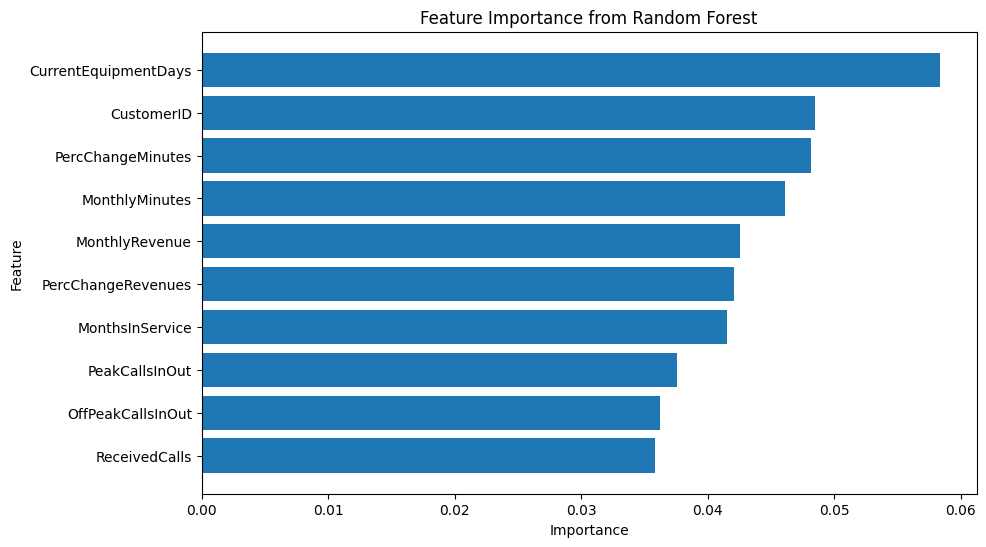

In [ ]:
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

importance_df = pd.DataFrame({
    'Feature': X_train.columns[indices],
    'Importance': importances[indices]
})

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # (places highest importance at the top)
plt.show()

From these results it can be seen that the most important feature is `CurrentEquipmentDays` followed by `CustomerID` and `PercChangeMinutes`. However, none of these features have an importance exceeding 0.07 indicating that this data may not be very reflective of its response variable. This supports our findings about about low sensitivity scores indicating that the data may not be able to predict this data at a higher level. However, with our current analysis, we cannot determine if this is the final result or if a more complex model, such as a neural network, might be able to achieve better results.

\
Our final model results are:

Accuracy: 0.72

Specificity: 0.98

Sensitivity: 0.06

F1: 0.10

## Remaining Questions
Given that our current model achieved a peak accuracy of approximately 0.72, we must evaluate whether higher accuracy can be achieved through alternative models, improved preprocessing, or more rigorous hyperparameter optimization. It is also possible that the dataset may not exhibit sufficient predictive relationships beyond this threshold, implying that achieving significantly better accuracy might be infeasible. The next step involves determining whether this limitation is intrinsic to the data or if there is potential for improvement.

To address these questions, we propose the following approaches:

Data Enrichment:
  * Our initial analysis was constrained by missing data in the provided CSV files. Exploring additional data sources, such as customer feedback, satisfaction surveys, competitor benchmarking, or service quality metrics, could reveal new predictive signals to enhance model performance.

Feature Engineering:
  * We can experiment with advanced feature engineering techniques, including the creation of interaction terms and non-linear transformations, to better capture complex relationships within the data.

Behavioral Analysis:
  * Segmenting customers based on behavioral patterns (e.g., high spenders versus low spenders) could provide insights into subgroup-specific trends and improve predictive performance for targeted segments.

Model Exploration:
  * Testing more complex models, such as ensemble stacking or neural networks, could potentially capture relationships that simpler models may overlook.

These strategies will allow us to assess whether the current limitations are due to the dataset or the modeling approach, and guide our efforts toward optimizing model performance.